# 最急降下法を用いた最適化
今回は、最急降下法を用いた関数の最適化を行いましょう。
関数$f:\mathbb{R}^n\to\mathbb{R}$ に対する**最急降下法**は、適当な出発点$x^{(1)}\in\mathbb{R}^n$について、下記の反復式、
\begin{align*}
x^{(k+1)}:=x^{(k)}+\alpha^{(k)}d^{(k)}\quad(k=1,2,\ldots)
\end{align*}
によって一定の条件下で最適解に収束する点列$\{x^{(k)}\}$ を生成するものでした。
ここで、$d^{(k)}:=-\nabla f(x^{(k)})$ は勾配の逆方向として定められる**最急降下方向** で、また$\alpha^{(k)}\in(0,\infty)\ (k=1,2,\ldots)$ は$-\nabla f(x^{(k)})$ 方向に沿って目的関数を十分小さくするような**ステップ幅**と呼ばれる実数です。

今回は、ステップ幅を選ぶ基準としてよく用いられる**強Wolfe 条件**を満たすような実数を用い、最急降下法を実装、およびその挙動を確認してみましょう。

## 目的関数とその勾配
今回は、目的関数として次の２変数関数、
\begin{align*}
f(x_0, x_1):=\sin\left(\frac{1}{2}x_0^2-\frac{1}{4}x_1^2+3\right)\cos(2x_0+1-e^{x_1})
\end{align*}
を考えましょう。
最急降下法の実行には、与えられた点$x^{(k)}\ (k=1,2,\ldots)$ に対して、目的関数の値$f(x^{(k)})$と、その勾配$\nabla f(x^{(k)})$ が、それぞれ計算できる必要がありました。
そこで、目的関数を`fun`、またその勾配を`jac` として、それぞれPython 上の関数として、まず実装しましょう。

In [1]:
import numpy as np

def fun(x):
    return np.sin((x[0] ** 2) / 2 - (x[1] ** 2 ) / 4 + 3) * np.cos(2 * x[0] + 1 - np.exp(x[1]))

def jac(x):
    u, v = (x[0] ** 2) / 2 - (x[1] ** 2 ) / 4 + 3, 2 * x[0] + 1 - np.exp(x[1])
    return np.array([
        x[0] * np.cos(u) * np.cos(v) - 2 * np.sin(u) * np.sin(v),
        np.exp(x[1]) * np.sin(u) * np.sin(v) - (x[1] / 2) * np.cos(u) * np.cos(v)
    ])

なお、今回用いる目的関数は、下記のような複雑な形状をしているものです。

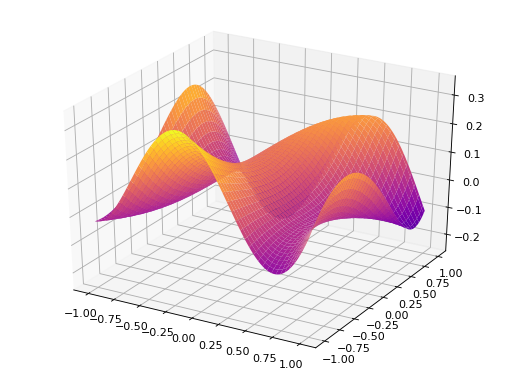

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(8, 6), dpi=80)
ax = plt.axes(projection='3d')
X, Y = np.meshgrid(np.linspace(-1, 1, 100), np.linspace(-1, 1, 100))
Z = np.array([[fun(np.array([x, y])) for x, y in zip(vx, vy)] for vx, vy in zip(X, Y)])
ax.plot_surface(X, Y, Z, cmap='plasma')

## 最急降下法の実装
では早速、最急降下法のプログラムを作成しましょう。
ここでは、初期点$x_1:=(-0.3, 0.2)^\top$、反復回数は15 回としました。
各反復$k$ において、目的関数`fun` およびその勾配`jac` に対する、現在の点`xk` および降下方向`dk` での強Wolfe 条件を満たすステップ幅`alpha` は、
```python
alpha = line_search(fun, jac, xk, dk)[0]
```
により求めることができます。
以下は、生成点列をリスト`sequence` として格納していく最急降下法の実装です。

In [3]:
import numpy as np
from scipy.optimize import line_search

xk = np.array([-0.3, 0.2])
sequence = [xk]
for k in range(15):
    dk = -jac(xk)
    alpha = line_search(fun, jac, xk, dk)[0]
    xk = xk + alpha * dk
    sequence.append(xk)

## 生成点列の挙動の確認
それでは、最急降下法により生成した点列`sequence` の挙動を、関数`fun` に関する等高線グラフの上に描画し、確認してみましょう。

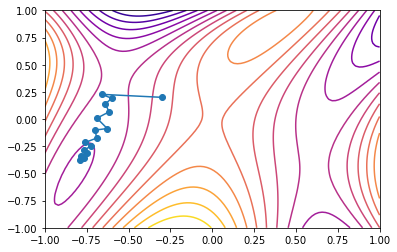

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
X, Y = np.meshgrid(np.linspace(-1, 1, 100), np.linspace(-1, 1, 100))
Z = np.array([[fun(np.array([x, y])) for x, y in zip(vx, vy)] for vx, vy in zip(X, Y)])
plt.contour(X, Y, Z, cmap='plasma', levels=np.linspace(np.min(Z), np.max(Z), 15))
sequence = np.array(sequence)
plt.plot(sequence[:, 0], sequence[:, 1], marker='o')

図のように、確かに点列は初期点$(-0.3, 0.2)^\top$ から関数値の小さい(青色の)方向へ移動していることが分かります。
しかし同時に、最急降下法は見て分かるように非常にジグザグした挙動をし、あまり効率的に解へ収束してはいないことも確認できます。

## 参考文献
  * 福島雅夫著『新版　数理計画入門』(朝倉書店; 2011)
  * 矢部博著『工学基礎　最適化とその応用』(数理工学社; 2006)
  * [Gradient descent - Wikipedia](https://en.wikipedia.org/wiki/Gradient_descent) (目的関数はこのページのものを使用しました。)